In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing Whole Slide Images (WSIs) with pyWSI

Now import pyWSI

In [2]:

import sys
sys.path.append('/home/jmalagont/Documentos/MLDS6project/src/nombre_paquete/preprocessing')
import pyWSI as pywsi

# 1.) Open SVS slide images.

Slide properties:
{'aperio.AppMag': '40', 'aperio.DSR ID': 'ap1336-dsr', 'aperio.Date': '12/05/11', 'aperio.DisplayColor': '0', 'aperio.Exposure Scale': '0.000001', 'aperio.Exposure Time': '109', 'aperio.Filename': '46188', 'aperio.Focus Offset': '0.000500', 'aperio.ICC Profile': 'ScanScope v1', 'aperio.ImageID': '46188', 'aperio.Left': '16.526157', 'aperio.LineAreaXOffset': '0.000000', 'aperio.LineAreaYOffset': '0.000000', 'aperio.LineCameraSkew': '-0.001615', 'aperio.MPP': '0.2521', 'aperio.OriginalHeight': '75178', 'aperio.OriginalWidth': '131000', 'aperio.ScanScope ID': 'SS1336', 'aperio.StripeWidth': '1000', 'aperio.Time': '16:34:09', 'aperio.Time Zone': 'GMT-08:00', 'aperio.Top': '23.175978', 'aperio.User': 'bcf19525-0142-4993-b774-fb5ad5362126', 'openslide.comment': 'Aperio Image Library v11.1.6\r\n125753x75078 (256x256) JPEG/RGB Q=30;Aperio Image Library v11.1.6\r\n131000x75178 [0,100 125753x75078] (256x256) J2K/YUV16 Q=70|AppMag = 40|StripeWidth = 1000|ScanScope ID = SS1336|Fi

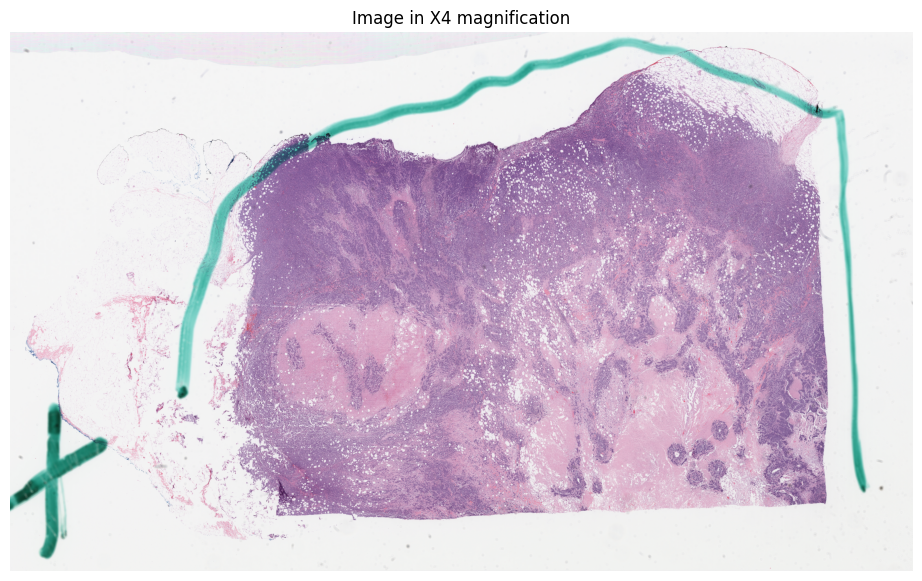

In [3]:
slide = pywsi.svs_read('/run/media/jmalagont/Thesis/Thesis/DataSet/TCGA-BRCA/WSI/TCGA-A1-A0SK.svs')

properties = dict(slide.properties)
print('Slide properties:')
print(properties)
size = list(slide.level_dimensions)
print('Slide size:')
print(size)

imageX04 = np.array(slide.read_region((0, 0), 3, size[3]).convert('RGB'))

fig, char = plt.subplots(1,1)
fig.set_size_inches(30, 7)

char.imshow(imageX04)
char.axis('off')
char.set_title('Image in X4 magnification')

plt.show()

# 2.)Filters

## 2.1.) Blue ratio

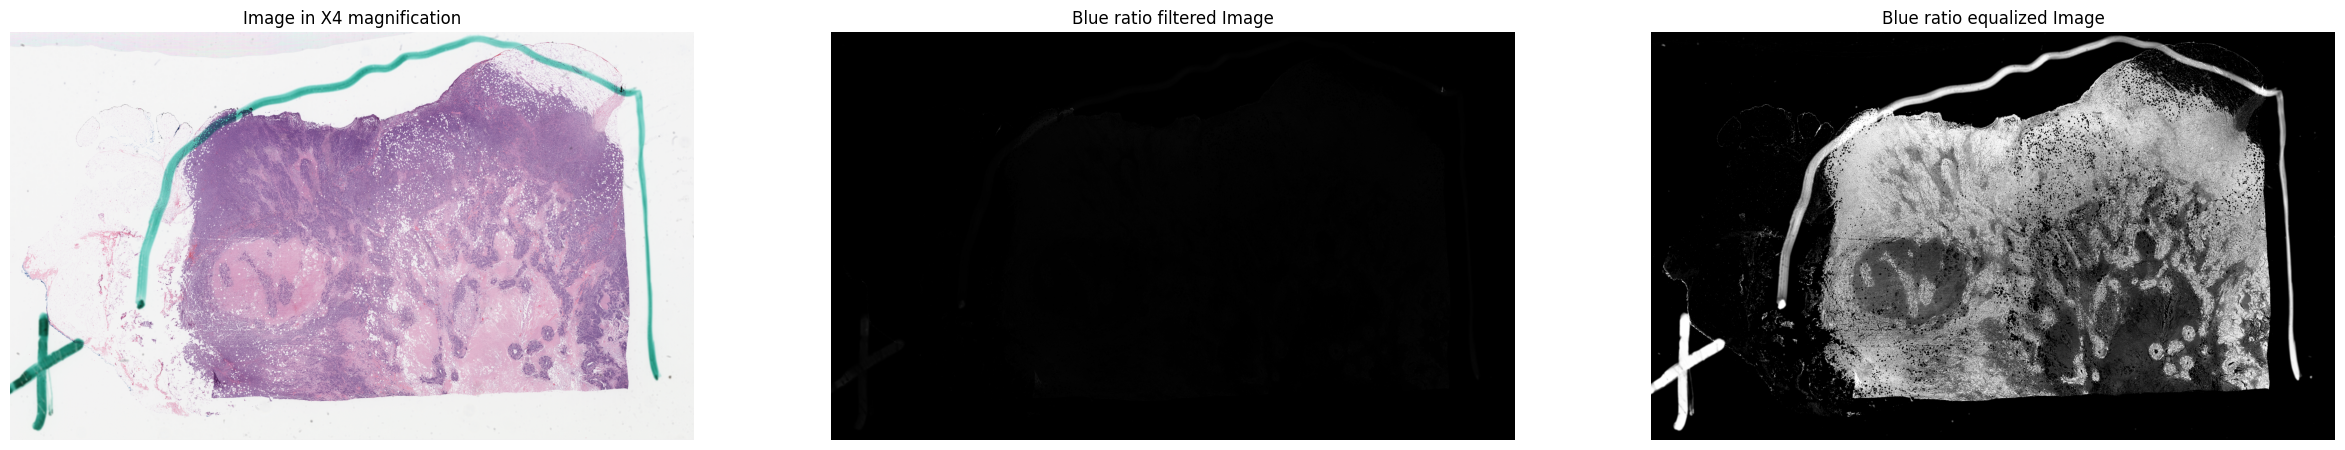

In [4]:
slide = pywsi.svs_read('/run/media/jmalagont/Thesis/Thesis/DataSet/TCGA-BRCA/WSI/TCGA-A1-A0SK.svs')
size = list(slide.level_dimensions)
imageX04 = np.array(slide.read_region((0, 0), (len(size)-1), size[-1]).convert('RGB'))

br = pywsi.blue_ratio(imageX04) #without histogram equalization
br_eq = pywsi.blue_ratio(imageX04, True) #with histogram equalization
br_bin = pywsi.blue_ratio(imageX04, equalize = True, binarized = True) #with histogram equalization

fig, char = plt.subplots(1,3)
fig.set_size_inches(30, 7)

char[0].imshow(imageX04)
char[0].axis('off')
char[0].set_title('Image in X4 magnification')

char[1].imshow(br, cmap='gray')
char[1].axis('off')
char[1].set_title('Blue ratio filtered Image')

char[2].imshow(br_eq, cmap='gray')
char[2].axis('off')
char[2].set_title('Blue ratio equalized Image')

plt.show()

## 2.3.) Tissue segmentation

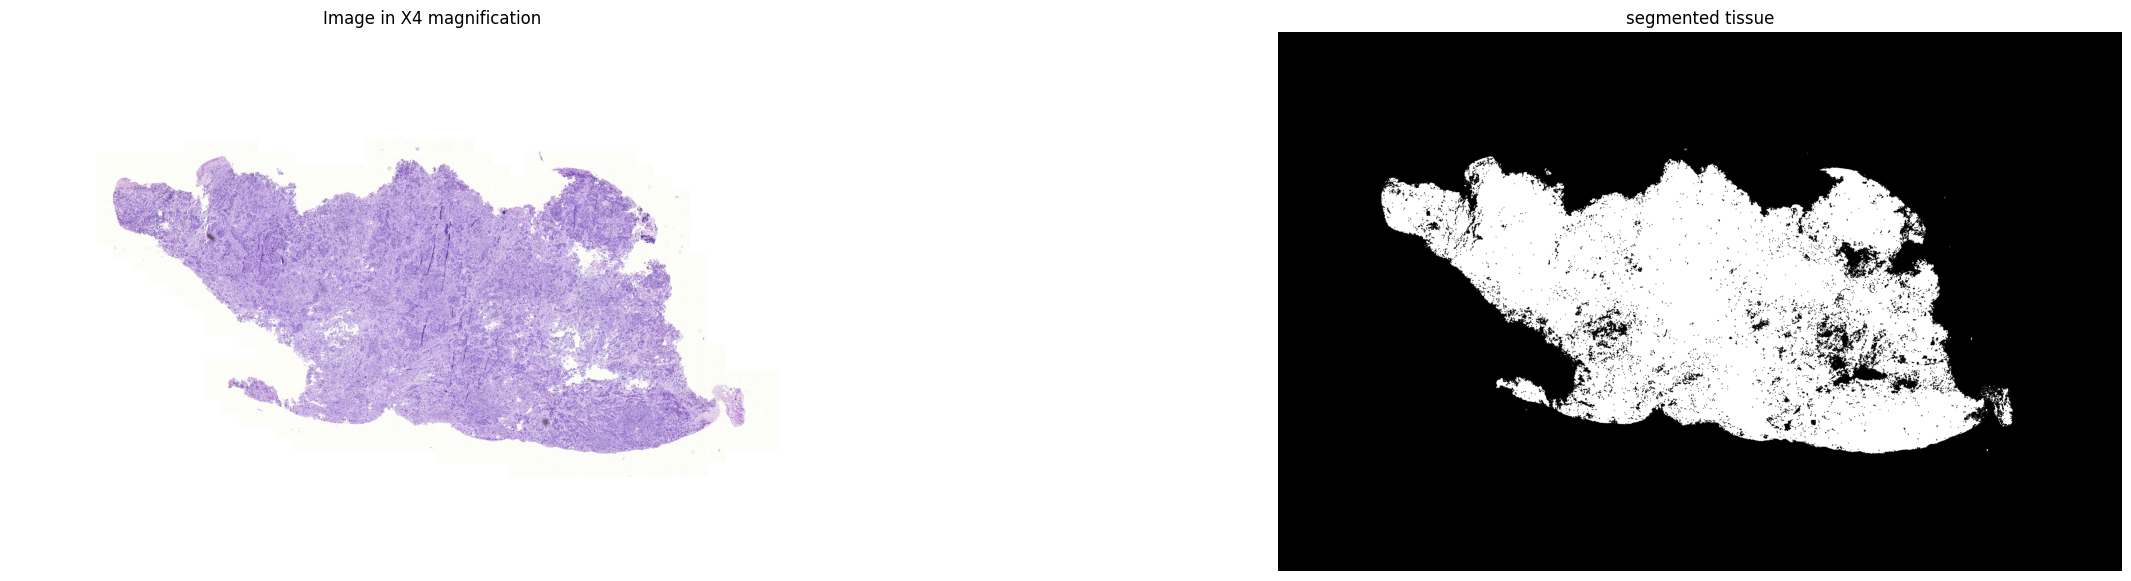

In [5]:
from skimage import exposure, filters

slide = pywsi.svs_read('/run/media/jmalagont/Thesis/Thesis/DataSet/TCGA-BRCA/WSI/TCGA-A8-A07C.svs')
size = list(slide.level_dimensions)
imageX04 = np.array(slide.read_region((0, 0), (len(size)-1), size[-1]).convert('RGB'))

tissue_mask = pywsi.tissue_segmentation(imageX04, footprint_size=None)

fig, char = plt.subplots(1,2)
fig.set_size_inches(30, 7)

char[0].imshow(imageX04)
char[0].axis('off')
char[0].set_title('Image in X4 magnification')

char[1].imshow(tissue_mask, cmap='gray')
char[1].axis('off')
char[1].set_title('segmented tissue')

plt.show()

## 2.2.) Pen marker artifact detection

In [6]:
slide = pywsi.svs_read('/run/media/jmalagont/Thesis/Thesis/DataSet/TCGA-BRCA/WSI/TCGA-A1-A0SK.svs')
size = list(slide.level_dimensions)
imageX04 = np.array(slide.read_region((0, 0), 3, size[3]).convert('RGB'))

clean_patch_0 = imageX04[1500:1600, 1000:1100]
clean_patch_1 = imageX04[800:900, 3200:3300]

noise_patch_0 = imageX04[500:600, 1100:1200]
noise_patch_1 = imageX04[100:200, 3000:3100]

colors = ['red', 'green', 'blue']
clean_0_pen_percentage = [pywsi.marker_detection(clean_patch_0, color) for color in colors]
clean_1_pen_percentage = [pywsi.marker_detection(clean_patch_1, color) for color in colors]

noise_0_pen_percentage = [pywsi.marker_detection(noise_patch_0, color) for color in colors]
noise_1_pen_percentage = [pywsi.marker_detection(noise_patch_1, color) for color in colors]

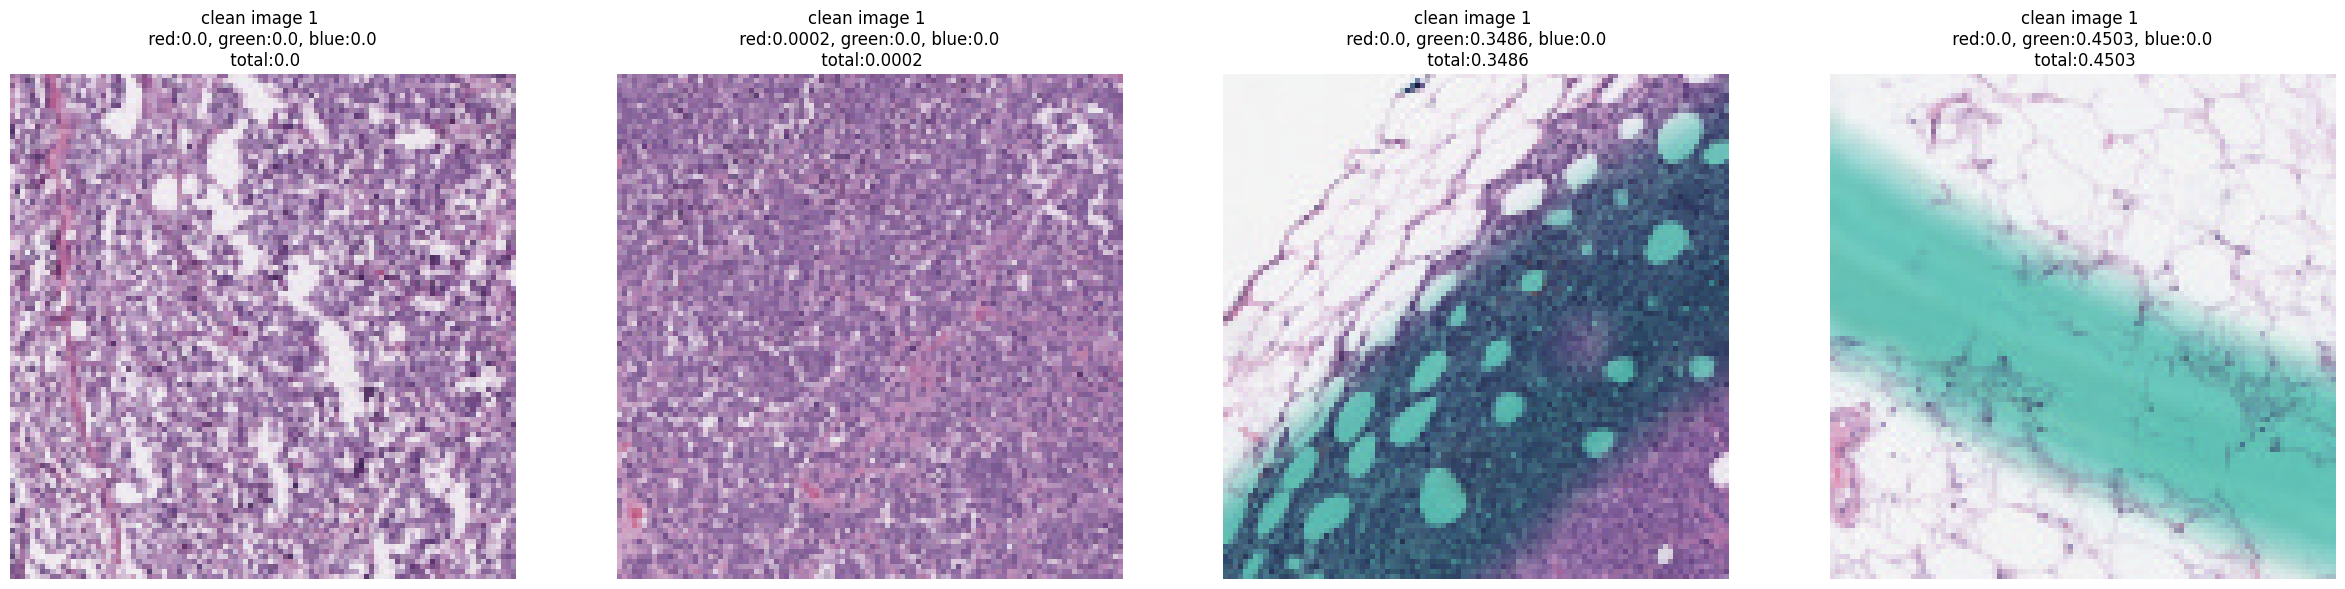

In [7]:
fig, char = plt.subplots(1,4)
fig.set_size_inches(30, 7)

char[0].imshow(clean_patch_0)
char[0].axis('off')
char[0].set_title(f'clean image 1 \n red:{clean_0_pen_percentage[0]}, green:{clean_0_pen_percentage[1]}, blue:{clean_0_pen_percentage[2]} \n total:{np.sum(clean_0_pen_percentage)}')

char[1].imshow(clean_patch_1)
char[1].axis('off')
char[1].set_title(f'clean image 1 \n red:{clean_1_pen_percentage[0]}, green:{clean_1_pen_percentage[1]}, blue:{clean_1_pen_percentage[2]} \n total:{np.sum(clean_1_pen_percentage)}')

char[2].imshow(noise_patch_0)
char[2].axis('off')
char[2].set_title(f'clean image 1 \n red:{noise_0_pen_percentage[0]}, green:{noise_0_pen_percentage[1]}, blue:{noise_0_pen_percentage[2]} \n total:{np.sum(noise_0_pen_percentage)}')

char[3].imshow(noise_patch_1)
char[3].axis('off')
char[3].set_title(f'clean image 1 \n red:{noise_1_pen_percentage[0]}, green:{noise_1_pen_percentage[1]}, blue:{noise_1_pen_percentage[2]} \n total:{np.sum(noise_1_pen_percentage)}')

plt.show()

# 3.) ROI finders

set of function designed to find the region of interest into the WSIs

## 3.1.) Random patch selection

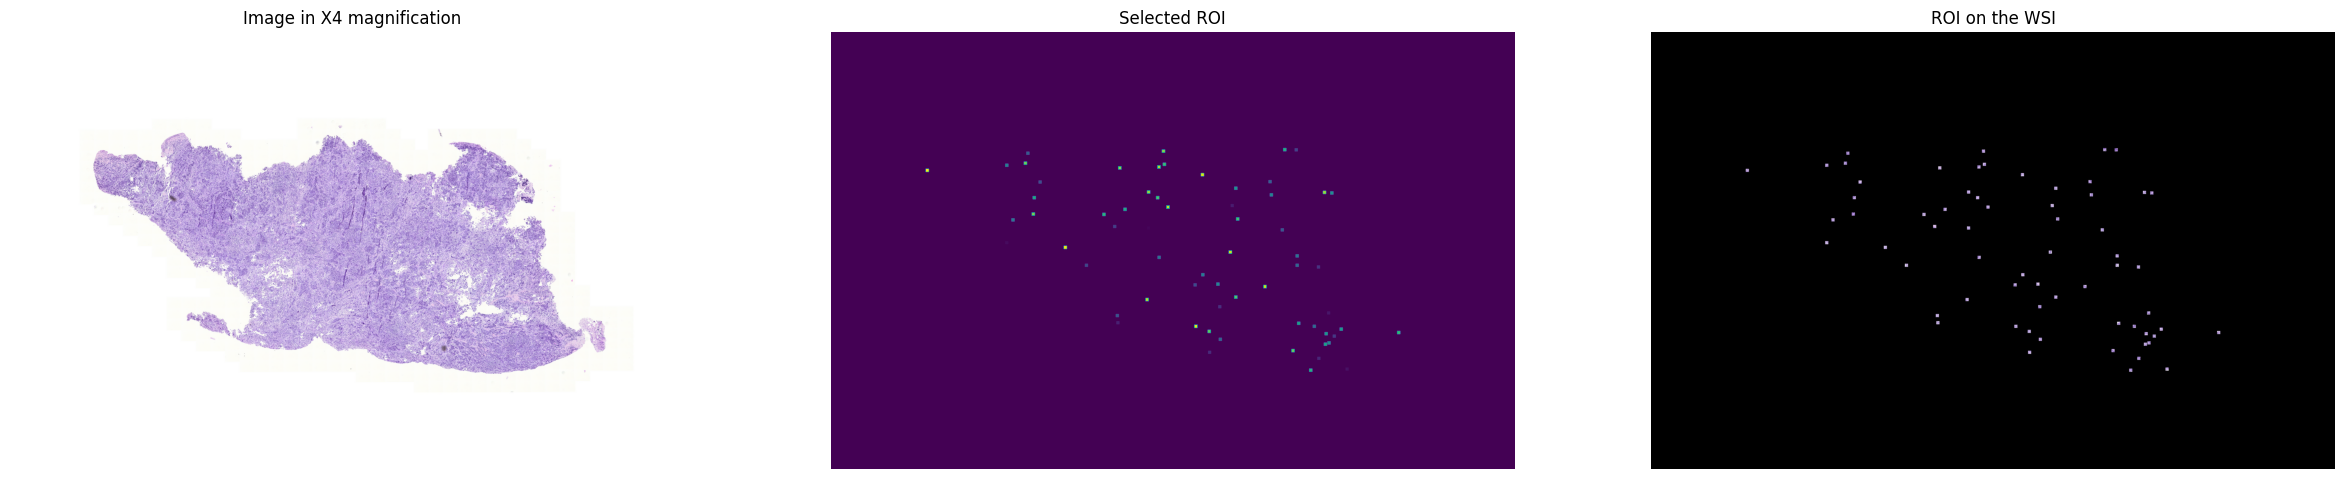

In [8]:
slide = pywsi.svs_read('/run/media/jmalagont/Thesis/Thesis/DataSet/TCGA-BRCA/WSI/TCGA-A8-A07C.svs')
size = list(slide.level_dimensions)
imageX04 = np.array(slide.read_region((0, 0), (len(size)-1), size[-1]).convert('RGB'))

ROI = pywsi.random_patch_roi(imageX04, 64, [17,17], tissue_rate=.7, artifact_remotion=True, artifact_percentage_umbral=.1, seed=2011)
imageX04_ROI = imageX04.copy()
imageX04_ROI[:,:,0] = imageX04_ROI[:,:,0] * (ROI>0)
imageX04_ROI[:,:,1] = imageX04_ROI[:,:,1] * (ROI>0)
imageX04_ROI[:,:,2] = imageX04_ROI[:,:,2] * (ROI>0)

fig, char = plt.subplots(1,3)
fig.set_size_inches(30, 7)

char[0].imshow(imageX04)
char[0].axis('off')
char[0].set_title('Image in X4 magnification')

char[1].imshow(ROI)
char[1].axis('off')
char[1].set_title('Selected ROI')

char[2].imshow(imageX04_ROI)
char[2].axis('off')
char[2].set_title('ROI on the WSI')

plt.show()

## 3.2.) Guided patch selection

Text(0.5, 1.0, 'ROI on the WSI')

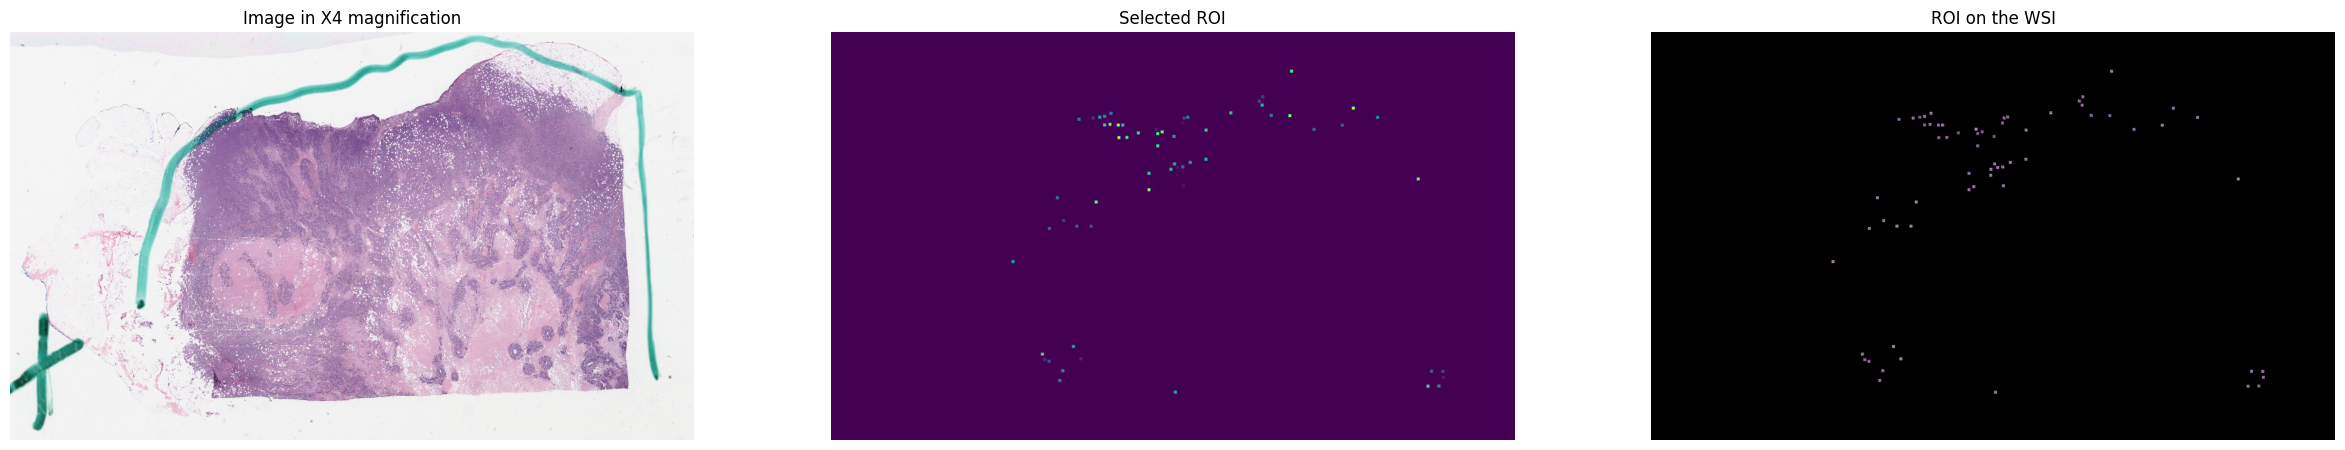

In [9]:
slide = pywsi.svs_read('/run/media/jmalagont/Thesis/Thesis/DataSet/TCGA-BRCA/WSI/TCGA-A1-A0SK.svs')
size = list(slide.level_dimensions)
imageX04 = np.array(slide.read_region((0, 0), (len(size)-1), size[-1]).convert('RGB'))

br = pywsi.blue_ratio(imageX04, equalize = True)
ROI = pywsi.guided_patch_roi(imageX04, 64, br, patch_shape=[17,17], relevance_factor = .8, artifact_remotion=True, artifact_percentage_umbral=.05)

imageX04_ROI = imageX04.copy()
imageX04_ROI[:,:,0] = imageX04_ROI[:,:,0] * (ROI>0)
imageX04_ROI[:,:,1] = imageX04_ROI[:,:,1] * (ROI>0)
imageX04_ROI[:,:,2] = imageX04_ROI[:,:,2] * (ROI>0)

fig, char = plt.subplots(1,3)
fig.set_size_inches(30, 7)

char[0].imshow(imageX04)
char[0].axis('off')
char[0].set_title('Image in X4 magnification')

char[1].imshow(ROI)
char[1].axis('off')
char[1].set_title('Selected ROI')

char[2].imshow(imageX04_ROI)
char[2].axis('off')
char[2].set_title('ROI on the WSI')

# 4.) patch extractions
A function designed to efficent extraction of patches

Text(0.5, 1.0, 'ROI on X20 magnification (size: (1024, 1024, 3))')

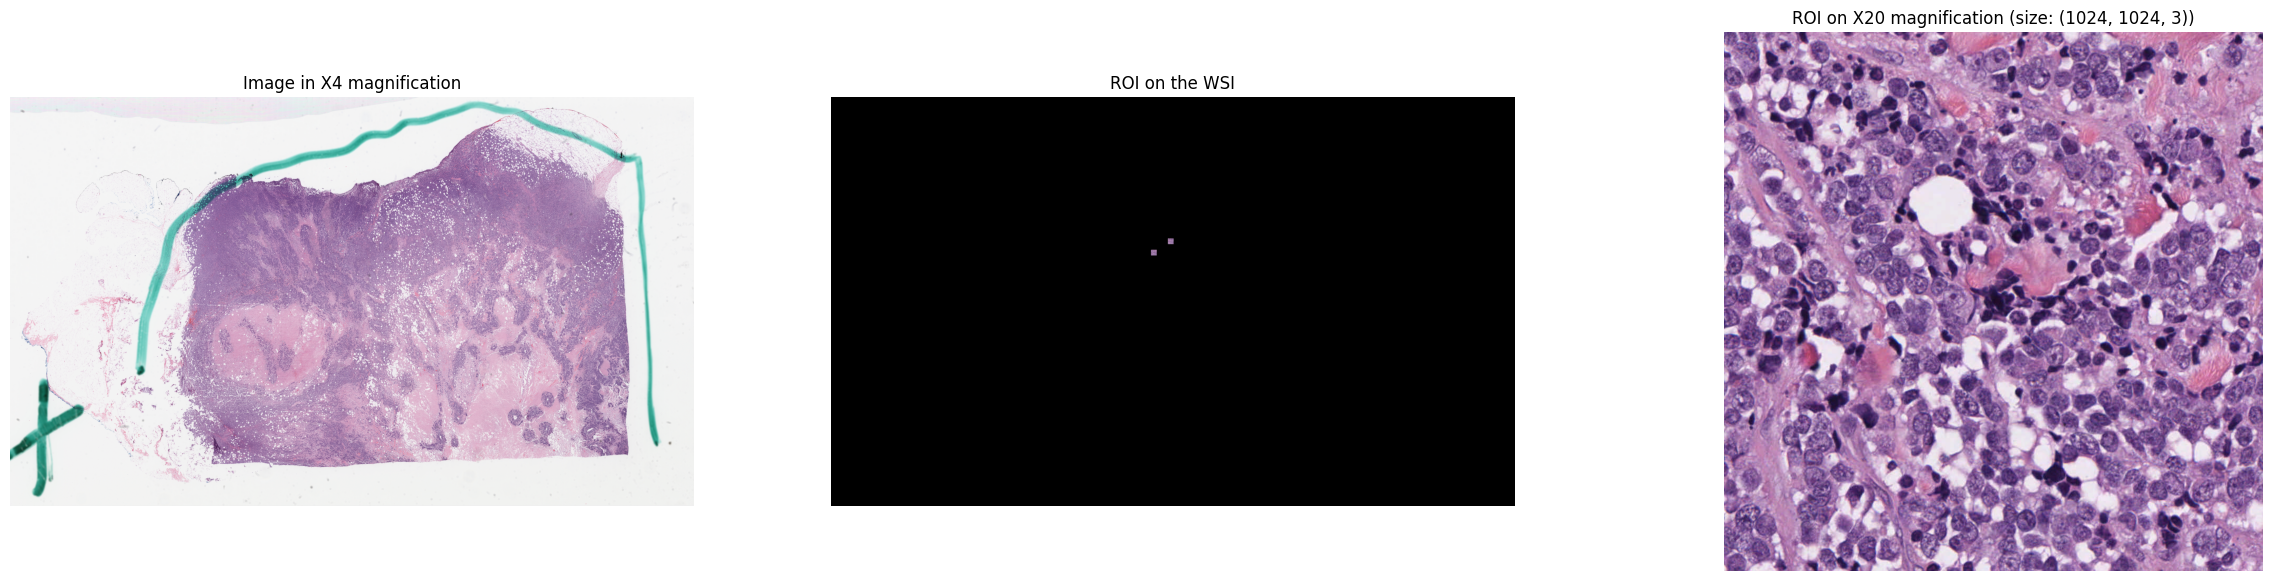

In [11]:
slide = pywsi.svs_read('/run/media/jmalagont/Thesis/Thesis/DataSet/TCGA-BRCA/WSI/TCGA-A1-A0SK.svs')
size = list(slide.level_dimensions)
imageX04 = np.array(slide.read_region((0, 0), (len(size)-1), size[-1]).convert('RGB'))

br = pywsi.blue_ratio(imageX04, equalize = True)
ROI = pywsi.guided_patch_roi(imageX04, 2, br, patch_shape=[33,33], relevance_factor = .8, artifact_remotion=True, artifact_percentage_umbral=.05)

patches = pywsi.patch_extractions(slide, (len(size)-1), 0, ROI,1, verbose= False)
patch = patches[0]

imageX04_ROI = imageX04.copy()
imageX04_ROI[:,:,0] = imageX04_ROI[:,:,0] * (ROI>0)
imageX04_ROI[:,:,1] = imageX04_ROI[:,:,1] * (ROI>0)
imageX04_ROI[:,:,2] = imageX04_ROI[:,:,2] * (ROI>0)

fig, char = plt.subplots(1,3)
fig.set_size_inches(30, 7)

char[0].imshow(imageX04)
char[0].axis('off')
char[0].set_title('Image in X4 magnification')

char[1].imshow(imageX04_ROI)
char[1].axis('off')
char[1].set_title('ROI on the WSI')

char[2].imshow(patch)
char[2].axis('off')
char[2].set_title(f'ROI on X20 magnification (size: {np.shape(patch)})')

# 5.) patch assembly

 Waiting (100.0)% ...

Text(0.5, 1.0, 'Assambly')

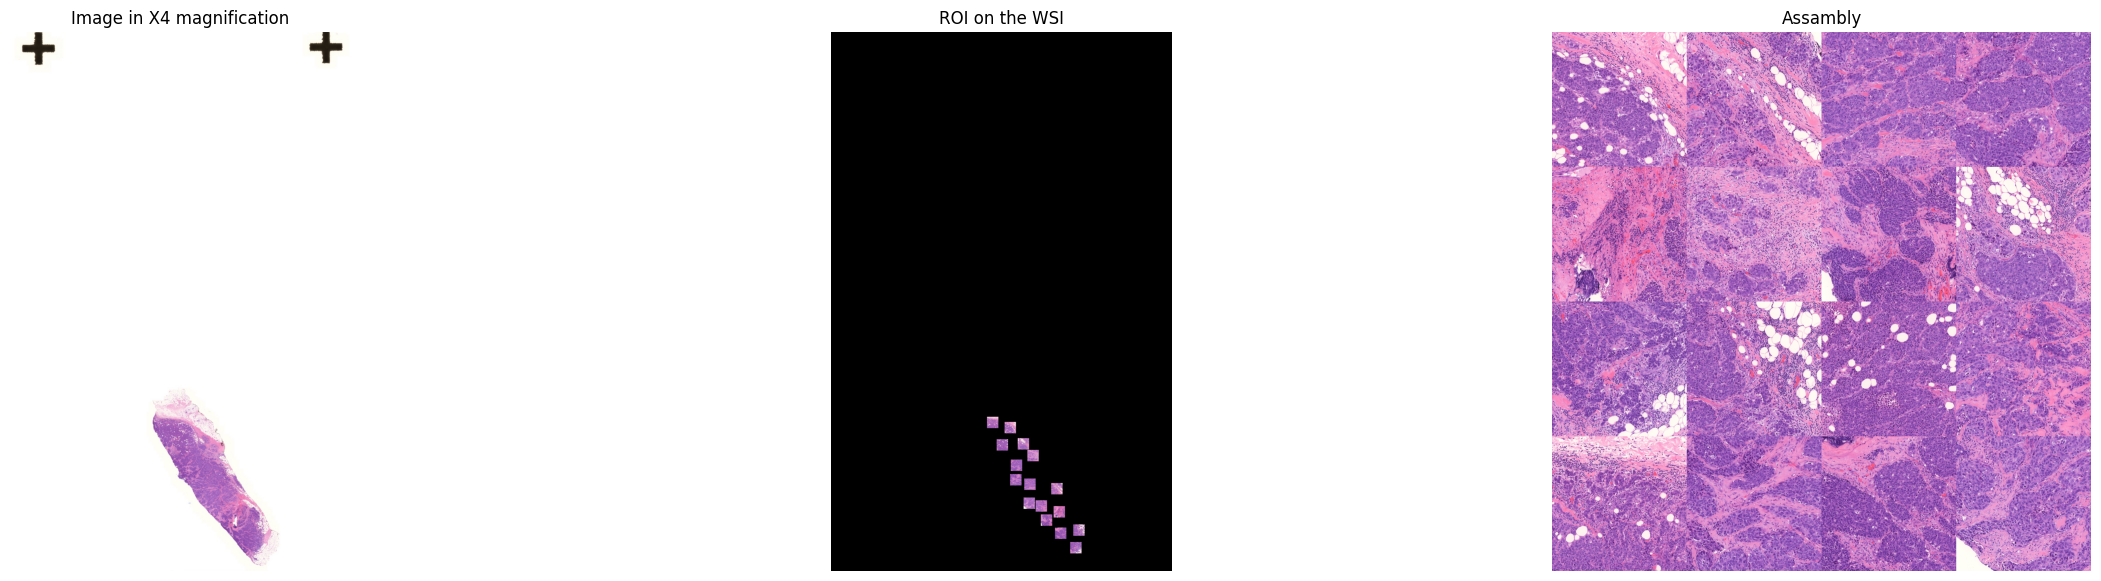

In [3]:
slide = pywsi.svs_read('/run/media/jmalagont/Thesis/Thesis/DataSet/TCGA-BRCA/WSI/TCGA-OL-A6VO.svs')
size = list(slide.level_dimensions)
imageX04 = np.array(slide.read_region((0, 0), (len(size)-1), size[-1]).convert('RGB'))

ROI = pywsi.random_patch_roi(imageX04, 16, [33,33], tissue_rate=.95, artifact_remotion=True, artifact_percentage_umbral=.1, seed=2011)
patches = pywsi.patch_extractions(slide, (len(size)-1), 0, ROI,2, workers = None, verbose= True)
assambly = pywsi.patch_assembly(patches, assambly_size=None)

imageX04_ROI = imageX04.copy()
imageX04_ROI[:,:,0] = imageX04_ROI[:,:,0] * (ROI>0)
imageX04_ROI[:,:,1] = imageX04_ROI[:,:,1] * (ROI>0)
imageX04_ROI[:,:,2] = imageX04_ROI[:,:,2] * (ROI>0)

fig, char = plt.subplots(1,3)
fig.set_size_inches(30, 7)

char[0].imshow(imageX04)
char[0].axis('off')
char[0].set_title('Image in X4 magnification')

char[1].imshow(imageX04_ROI)
char[1].axis('off')
char[1].set_title('ROI on the WSI')

char[2].imshow(assambly)
char[2].axis('off')
char[2].set_title('Assambly')